# 📊 Life Expectancy Analysis with Python

> Life expectancy is a crucial indicator of a country's overall health and well-being. Numerous factors, including economic, social, and health-related aspects, can influence life expectancy across different regions. In this notebook, we will explore and model life expectancy using the following machine learning techniques:
> 1. Linear Regression
> 2. Random Forest Regressor
> 3. Artificial Neural Networks (ANN)



# 💾 Data

> For this analysis, we will use the `Life Expectancy (WHO)` dataset. Life expectancy is a continuous variable, making this a regression problem. The dataset contains the following columns:
> * '`Country`': The name of the country.
> * '`Year`': The year of the observation.
> * '`Status`': Whether the country is developed or developing.
> * '`Life expectancy`': The average life expectancy in years.
> * '`Adult Mortality`': Adult mortality rates of both sexes (probability of dying between 15 and 60 years per 1000 population).
> * '`Infant Deaths`': The number of infant deaths per 1000 population.
> * '`Alcohol`': Alcohol consumption per capita (in liters of pure alcohol).
> * '`Percentage expenditure`': Expenditure on health as a percentage of Gross Domestic Product (GDP) per capita.
> * '`Hepatitis B`': Hepatitis B immunization coverage among 1-year-olds (in percentage).
> * '`Measles`': The number of reported measles cases per 1000 population.
> * '`BMI`': Average Body Mass Index of the entire population.
> * '`Under-five deaths`': The number of under-five deaths per 1000 population.
> * '`Polio`': Polio (Pol3) immunization coverage among 1-year-olds (in percentage).
> * '`Total expenditure`': General government expenditure on health as a percentage of total government expenditure (in percentage).
> * '`Diphtheria`': Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (in percentage).
> * '`HIV/AIDS`': Deaths per 1000 live births due to HIV/AIDS (for ages 0-4 years).
> * '`GDP`': Gross Domestic Product per capita (in USD).
> * '`Population`': The population of the country.
> * '`Thinness 1-19 years`': Prevalence of thinness among children and adolescents aged 10 to 19 (in percentage).
> * '`Thinness 5-9 years`': Prevalence of thinness among children aged 5 to 9 (in percentage).
> * '`Income composition of resources`': Human Development Index in terms of income composition of resources (index ranging from 0 to 1).
> * '`Schooling`': The number of years of schooling (in years).



# 🎯 Goal
In this notebook, we will perform exploratory data analysis (EDA), preprocess the data, and build models to predict life expectancy based on various influencing factors. The aim is to identify which factors are most significant, compare the models, and to provide actionable insights that could help improve life expectancy globally.


---

# Installation of Libraries

In [364]:
%pip install -q hvplot
%pip install -q matplotlib
%pip install -q seaborn
%pip install -q scikit-learn
%pip install -q selenium
%pip install -q plotly_express==0.4.0
%pip install tensorflow --ignore-installed
%pip install pydot

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


  Using cached tensorflow-2.17.0-cp39-cp39-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp39-cp39-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp39-cp39-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.4.0-cp39-cp39-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
  Using cached protobuf-4.25.4-cp39-cp39-win_amd64.whl.metadata (541 bytes)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Python39\\Lib\\site-packages\\wrapt\\_wrappers.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



Note: you may need to restart the kernel to use updated packages.


# 📤 Importing Libraries

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import os
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model #for model visualization

warnings.filterwarnings('ignore')

%matplotlib inline

## 💾 Data Retrieval

Let's begin by loading the data from the `Life Expectancy Data.csv` file.

This will load the life expectancy data into a pandas DataFrame.

In [366]:
# Load the dataset
life_expectancy_data = pd.read_csv('Life_Expectancy_Data.csv')

# Check the type and shape of the loaded data
type(life_expectancy_data)
life_expectancy_data.shape


(2938, 22)

Let's display the first 5 rows of the dataset to get an initial understanding of the data structure and the type of information we are working with.

In [367]:
pd.set_option('display.max_columns',None)
life_expectancy_data.columns=life_expectancy_data.columns.str.strip()
life_expectancy_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Showing the trend of life expectancy over the years for each country

In [368]:
# Draw line plot to show the trend of life expectancy over the years
fig = px.line(
    life_expectancy_data.sort_values(by='Year'), 
    x='Year', 
    y='Life expectancy', 
    animation_frame='Country', 
    animation_group='Year', 
    color='Country', 
    title='Trend of Life Expectancy Over the Years'
)

# Update layout to center the title, make it bold, and adjust the figure size
fig.update_layout(
    title=dict(text='<b>Trend of Life Expectancy Over the Years</b>', x=0.5),
    width=1200,  # Adjust the width here
    height=800   # Adjust the height here
)

# Show the figure
fig.show()


---


## 💾 Data Preparation

The purpose of this section is to consult, clean, and preprocess the data if necessary (e.g., handle missing values, and outliers), and to perform initial data exploration (e.g., descriptive statistics, visualizations).

### Initial Data Information
Let's begin by checking the following information:
- Number of rows and columns
- Data types of the columns
- Number of missing values per column

In [369]:
life_expectancy_data.info()
print("Number of null values per column:")
# Number of null values per column
life_expectancy_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

### Descriptive Statistics & Visualizing the Data Distribution

Lets Start with basic statistical summaries (mean, median, standard deviation) for each feature.

In addition the visualization will give us a clear understanding of the distribution of each numerical feature, helping us identify any skewness, outliers, or unusual patterns in the data.

In [370]:
# Descriptive Statistics
life_expectancy_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


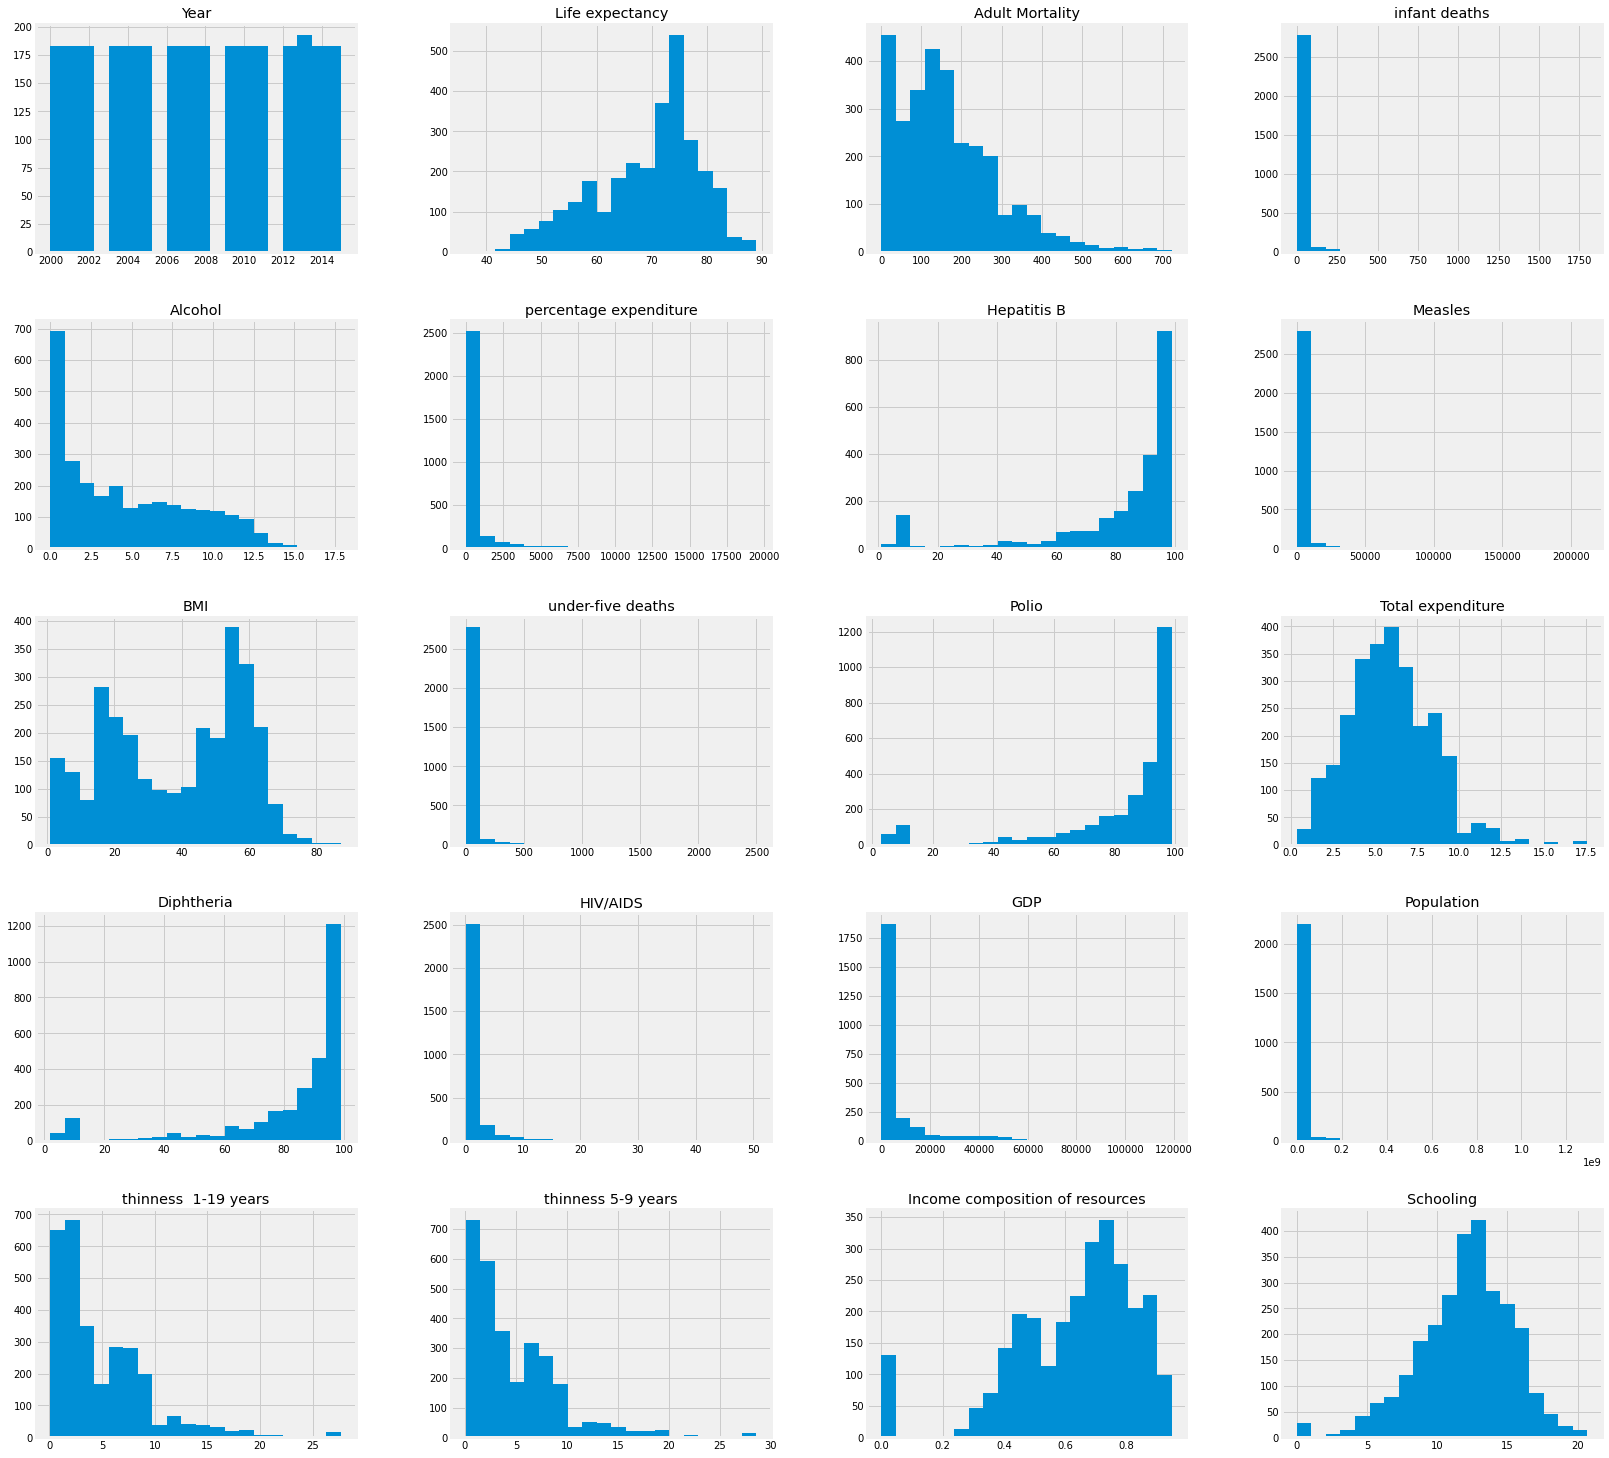

In [371]:
# Histograms for numerical data
life_expectancy_data.hist(bins=20, figsize=(25, 26))
plt.show()

**Key Observations:**

| Variable                        | Mean         | Std Dev     | Min        | Max          | Non-Null Count | Data Type | Observations                                                                                   |
|---------------------------------|--------------|-------------|------------|--------------|----------------|-----------|------------------------------------------------------------------------------------------------|
| **Country**                     | N/A          | N/A         | N/A        | N/A          | 2938           | object    | No missing values; categorical data representing different countries in the dataset.           |
| **Status**                      | N/A          | N/A         | N/A        | N/A          | 2938           | object    | No missing values; categorical data indicating whether a country is developed or developing.   |
| **Year**                        | 2007.52      | 4.61        | 2000       | 2015         | 2938           | int64     | Data spans 16 years, evenly distributed across the period.                                     |
| **Life Expectancy**             | 69.22        | 9.52        | 36.30      | 89.00        | 2928           | float64   | Significant range; countries with lower life expectancy likely impacted by high mortality.     |
| **Adult Mortality**             | 164.80       | 124.29      | 1.00       | 723.00       | 2928           | float64   | Wide variability, reflecting differences in healthcare quality and access among countries.     |
| **Infant Deaths**               | 30.30        | 117.93      | 0.00       | 1800.00      | 2938           | int64     | Right-skewed distribution with some countries having extremely high infant mortality rates.    |
| **Alcohol Consumption**         | 4.60         | 4.05        | 0.01       | 17.87        | 2744           | float64   | Alcohol consumption varies significantly, with a right-skewed distribution.                   |
| **Percentage Expenditure**      | 738.25       | 1987.91     | 0.00       | 19479.91     | 2938           | float64   | Extremely high values in some countries, suggesting outliers, likely from small GDP values.    |
| **Hepatitis B Immunization**    | 80.94        | 25.07       | 1.00       | 99.00        | 2385           | float64   | Generally high coverage but some countries show very low rates, indicating possible gaps.      |
| **Measles Cases**               | 2419.59      | 11467.27    | 0.00       | 212183.00    | 2938           | int64     | Large disparities with some countries reporting very high cases, suggesting localized outbreaks.|
| **BMI**                         | 38.32        | 20.04       | 1.00       | 87.30        | 2904           | float64   | Reflects diverse health profiles; distribution shows slight right skewness.                     |
| **Under-Five Deaths**           | 42.04        | 160.44      | 0.00       | 2500.00      | 2938           | int64     | Similar pattern to infant deaths, with some extreme outliers reflecting high child mortality.  |
| **HIV/AIDS Deaths**             | 1.74         | 5.08        | 0.10       | 50.60        | 2938           | float64   | Most countries report low mortality, but a few have significantly higher rates.                |
| **GDP per Capita**              | 7483.16      | 14270.17    | 1.68       | 119172.74    | 2490           | float64   | Extreme variability, with a right-skewed distribution; large economic disparities observed.    |
| **Population**                  | 12753380.00  | 61012100.00 | 34.00      | 1293859000.00| 2286           | float64   | Wide range, extremely right-skewed by countries with very large populations like India/China.  |
| **Thinness 1-19 years**         | 4.84         | 4.42        | 0.10       | 27.70        | 2904           | float64   | Prevalence varies; some countries have extreme cases reflecting significant health concerns.   |
| **Thinness 5-9 years**          | 4.87         | 4.51        | 0.10       | 28.60        | 2904           | float64   | Similar distribution to thinness 1-19 years, with right-skewness and some extreme values.      |
| **Income Composition of Resources** | 0.63    | 0.21        | 0.00       | 0.95         | 2771           | float64   | Reflects varied economic development levels, with a slightly left-skewed distribution.         |
| **Schooling (Years)**           | 11.99        | 3.36        | 0.00       | 20.70        | 2775           | float64   | Education levels vary significantly, with a left-skewed distribution towards higher values.    |

### Summary of Observations 

- **Missing Data**: Several columns have missing values, notably `Hepatitis B`, `GDP`, `Population`, `Schooling`, etc. This will need careful handling, possibly through imputation.
- **Outliers**: Extreme values are observed in variables like `Infant Deaths`, `Measles`, `Percentage Expenditure`, `GDP`, and `Population`, which may require special attention during data preprocessing.
- **Skewed Distributions**: Many variables exhibit skewness, particularly economic indicators and mortality rates. Transformations (e.g., log transformation) may be necessary to normalize these distributions.
- **Immunization Coverage**: High coverage is typical, but there are exceptions with low immunization rates in certain countries.
- **Economic Disparity**: The wide range in `GDP` and `Income Composition of Resources` highlights economic inequality across countries.
- **Health Disparities**: Large differences in mortality rates and health indicators suggest significant health disparities among countries.

## 💾 Exploratory Data Analysis (EDA)

In this section, we perform a more in-depth exploratory analysis of the data to identify trends, patterns, or relationships that could be useful in solving the problem at hand. This includes examining distributions, correlations, and other relevant characteristics within the dataset. This helps in identifying patterns, trends, and potential anomalies within the dataset, which are crucial for informing the subsequent modeling steps.


In [372]:
life_expectancy_data.hvplot.hist("Life expectancy")

:Histogram   [Life expectancy]   (Count)

#### Interpretation of the Life expectancy Histogram:

- **Distribution**: The histogram shows the frequency of different life expectancy values within the dataset. The x-axis represents life expectancy (in years), while the y-axis shows the number of observations (countries/years) corresponding to each life expectancy range.

- **Shape of Distribution**: The histogram suggests that life expectancy values are not uniformly distributed:
  - **Left Skewness**: The distribution appears to be slightly left-skewed, indicating that while most countries have life expectancy values clustered around 70-80 years, there are fewer countries with much lower life expectancy (below 60 years).
  - **Mode**: The highest bar around 70-75 years suggests that this is the most common range of life expectancy in the dataset.

  Now let us consider the correlation matrix.

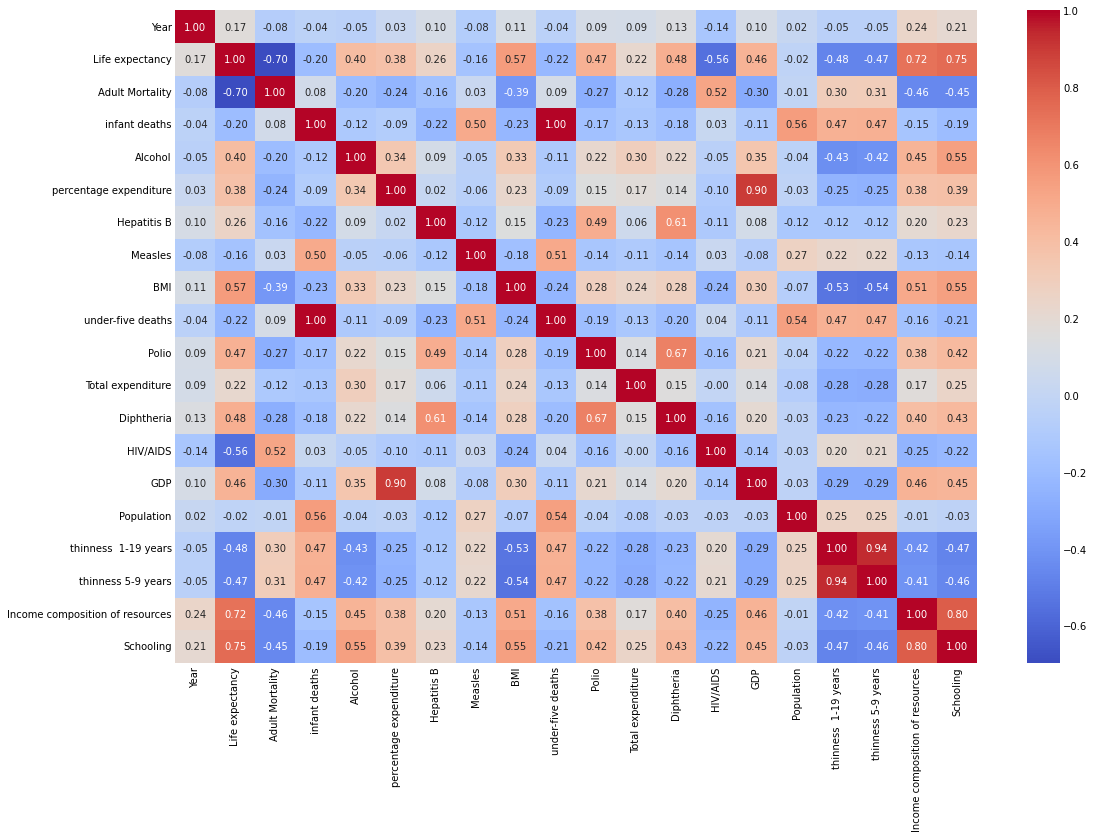

In [373]:
# Select only numeric columns (i.e., exclude categorical columns)
numeric_data = life_expectancy_data.select_dtypes(include=[int, float])

# Calculate correlation matrix without categorical columns
correlation_matrix = numeric_data.corr()

# Display the correlation matrix (optional)
# print(correlation_matrix)

# Create pairplot excluding categorical columns
plt.figure(figsize=(16, 12))

# Create the heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()

The correlation matrix shows the relationships between various features in the dataset.

### Key Observations:

1. **High Correlations (Multicollinearity):**
   - **Life Expectancy and Schooling (0.75):** There's a strong positive correlation between life expectancy and years of schooling. This suggests that more education is associated with higher life expectancy.
   - **Life Expectancy and Income Composition of Resources (0.72):** This strong correlation indicates that countries with better income composition tend to have higher life expectancy.
   - **Income Composition of Resources and Schooling (0.80):** These two features are highly correlated, indicating potential multicollinearity issues in regression models.
   - **Infant Deaths and Under-Five Deaths (0.99):** This near-perfect correlation suggests that these two variables may be redundant.
   - **Thinness 1-19 years and Thinness 5-9 years (0.94):** These are highly correlated and likely measure very similar or overlapping aspects of thinness, indicating potential redundancy.

2. **Negative Correlations:**
   - **Life Expectancy and Adult Mortality (-0.70):** There is a strong negative correlation, meaning higher adult mortality rates are associated with lower life expectancy.
   - **Life Expectancy and HIV/AIDS (-0.56):** This negative correlation suggests that higher rates of HIV/AIDS deaths are linked with lower life expectancy.
   - **BMI and Thinness (-0.53 to -0.54):** A strong negative correlation between BMI and thinness measures makes sense biologically, but having both in a model could be redundant.

### Implications to Avoid Issues:

1. **Address Multicollinearity:**
   - **Feature Selection:** High multicollinearity can affect the performance of Linear Regression models, which assume that the predictor variables are independent. To address this, consider removing one feature from highly correlated pairs. For example, `Thinness 1-19 years` and `Thinness 5-9 years` are highly correlated (0.94), so one of these could be removed to reduce redundancy.
   - **Regularization Techniques:** In the context of Linear Regression, employing Ridge or Lasso regression can help manage multicollinearity by penalizing large coefficients, thus making the model more stable and interpretable.

2. **Avoid Redundancy:**
   - **Remove Redundant Features:** The extremely high correlation between `Infant Deaths` and `Under-Five Deaths` (correlation of 1.00) suggests that these variables are essentially the same in the context of their influence on life expectancy. Removing one of them can streamline the model without losing predictive power.
   - **Create Composite Features:** Instead of treating highly correlated features as separate variables, consider combining them into a composite feature. For instance, a single `Thinness` feature could be created by averaging `Thinness 1-19 years` and `Thinness 5-9 years`. This approach can help reduce the dimensionality of the model while retaining the necessary information.

3. **Handling Skewed Correlations:**
   - **Transformations:** For variables exhibiting skewness or non-linear relationships with life expectancy (such as `GDP` or `HIV/AIDS`), applying transformations like the logarithm can stabilize variance and create more linear relationships, which are particularly beneficial for models like Linear Regression.
   - **Outlier Management:** Outliers can disproportionately influence model predictions, particularly in Linear Regression. Examine strong correlations driven by outliers, and consider removing or capping these outliers to improve model accuracy.

4. **Model Selection and Application:**
   - **Linear Regression:** This model is sensitive to multicollinearity and outliers. After addressing these issues, Linear Regression can be a straightforward and interpretable model for understanding the impact of various factors on life expectancy.
   - **Random Forest Regressor:** This model is less sensitive to multicollinearity and can capture non-linear relationships between features and life expectancy. Random Forests are well-suited to handle complex interactions between variables without the need for feature transformations.
   - **Artificial Neural Networks (ANN):** ANNs can model complex, non-linear relationships and are less affected by multicollinearity. However, they require careful handling of feature scaling and may benefit from the use of composite features to reduce the dimensionality and improve training efficiency.

By addressing these considerations, the robustness and interpretability of the models will be enhanced, reducing the risk of overfitting and improving the accuracy of life expectancy predictions.

### Next Steps: Data and Feature Engineering

1. **Handle Missing Data**: Use appropriate imputation techniques or consider removing rows/columns with excessive missing data.
2. **Explore Outliers**: Investigate outliers and decide on appropriate handling strategies (e.g., transformation or removal).
3. **Standardization/Normalization**: Apply normalization or standardization depending on the model to manage skewness in the data.
4. **Feature Engineering**: Create or transform features to improve model performance based on insights from EDA.

These steps will ensure the data is prepared for robust and accurate modeling in the subsequent phases of analysis.

## 💾 **Data and Feature Engineering**

### 1. Handling Missing Values:
In this step, we address missing data by employing imputation techniques. Missing numerical values were imputed using the median, which is robust to outliers, ensuring that the central tendency of the data is preserved. For categorical features, the mode (most frequent value) was used to maintain consistency within each category.

In [374]:
# Handling missing values
# Impute missing values for numerical features with the median
numerical_features = life_expectancy_data.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
life_expectancy_data[numerical_features] = imputer.fit_transform(life_expectancy_data[numerical_features])

# Impute missing values for categorical features with the mode
categorical_features = life_expectancy_data.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
life_expectancy_data[categorical_features] = imputer.fit_transform(life_expectancy_data[categorical_features])

# Verify no missing values remain
life_expectancy_data.isnull().sum()


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

### 2. Exploring and Handling Outliers:
Outliers can significantly affect model performance, particularly in regression models. We deal with these outliers using boxplots for each feature and handle them by capping or transforming the data. This approach ensures that extreme values do not unduly influence the model.

In [375]:
# Number of columns for the grid
num_cols = 3

# Calculate the number of rows needed
num_rows = (len(life_expectancy_data.columns) + num_cols - 1) // num_cols

# Create a subplot grid
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=life_expectancy_data.columns)

# Loop through each column and create a box plot
for i, column in enumerate(life_expectancy_data.columns):
    row = (i // num_cols) + 1
    col = (i % num_cols) + 1
    
    # Create the box plot
    box_fig = px.box(life_expectancy_data, y=column)
    
    # Add the box plot to the grid
    fig.add_trace(
        go.Box(y=life_expectancy_data[column], name=column),
        row=row, col=col
    )

# Update layout to adjust the appearance
fig.update_layout(
    height=1400,  # Adjust height as needed
    width=1800,   # Adjust width as needed
    showlegend=False,  # Hide the legend
    title_text="Box Plots of Life Expectancy Data",
    title_x=0.5,  # Center the title
)

# Display the grid of box plots
fig.show()


Now to deal with the outliers, we use the Interquartile Range (IQR) method to identify outliers by calculating the lower and upper bounds for each selected column. Values falling outside these bounds were considered outliers and were replaced with the mean value of their respective column. This approach ensures that the model remains robust by minimizing the impact of extreme values while preserving the overall data distribution.

In [376]:
# Specify the list of columns you want to handle outliers for
cols_to_handle_outliers = [
    'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
    'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
    'thinness  1-19 years', 'thinness 5-9 years',
    'Income composition of resources', 'Schooling'
]

# Perform outlier handling for each specified column
for col_name in cols_to_handle_outliers:
    # Calculate quartiles and IQR
    q1 = life_expectancy_data[col_name].quantile(0.25)
    q3 = life_expectancy_data[col_name].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with the mean value of the column
    life_expectancy_data[col_name] = np.where((life_expectancy_data[col_name] > upper_bound) | (life_expectancy_data[col_name] < lower_bound), np.mean(life_expectancy_data[col_name]), life_expectancy_data[col_name])

In [377]:
# Number of columns for the grid
num_cols = 3

# Calculate the number of rows needed
num_rows = (len(life_expectancy_data.columns) + num_cols - 1) // num_cols

# Create a subplot grid
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=life_expectancy_data.columns)

# Loop through each column and create a box plot
for i, column in enumerate(life_expectancy_data.columns):
    row = (i // num_cols) + 1
    col = (i % num_cols) + 1
    
    # Create the box plot
    box_fig = px.box(life_expectancy_data, y=column)
    
    # Add the box plot to the grid
    fig.add_trace(
        go.Box(y=life_expectancy_data[column], name=column),
        row=row, col=col
    )

# Update layout to adjust the appearance
fig.update_layout(
    height=1400,  # Adjust height as needed
    width=1800,   # Adjust width as needed
    showlegend=False,  # Hide the legend
    title_text="Box Plots of Life Expectancy Data",
    title_x=0.5,  # Center the title
)

# Display the grid of box plots
fig.show()


We can see the plots are much better now. Now let us work on Handling Categorical Features (encoding) for 'Country' and 'Status'

### 3. Handling Categorical Features:
Categorical variables, particularly 'Country' and 'Status', were encoded to convert them into a format suitable for machine learning models. We used label encoding to transform these features, preserving their categorical nature while making them usable in the model.


In [378]:
print(life_expectancy_data['Country'].unique())
print(life_expectancy_data['Status'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)'

In [379]:
# Columns to apply label encoding
cols_to_encode = ['Country', 'Status']

# Apply label encoding to X
label_encoder_df = LabelEncoder()
for col in cols_to_encode:
    life_expectancy_data[col] = label_encoder_df.fit_transform(life_expectancy_data[col])

Below you can see the Values After Handling:

In [380]:
print(life_expectancy_data['Country'].unique())
print(life_expectancy_data['Status'].unique())

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  44  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192]
[1 0]


### 4. Removing Redundant Features:

To avoid multicollinearity and redundancy, we remove features with high correlations, specifically those identified in the exploratory data analysis. This step simplifies the model and improves its interpretability.

In [381]:
# Drop the specified columns
columns_to_drop = ['thinness 5-9 years', 'infant deaths', 'Life expectancy', 'Country']
X = life_expectancy_data.drop(columns=columns_to_drop, axis=1)

# Define the target variable
Y = life_expectancy_data['Life expectancy']

# Display the first few rows of X and y to confirm
# print("Features (X):")
# print(X.head())
# print("\nTarget (y):")
# print(y.head())

### 5. Splitting Data for Training and Testing:
Finally, we split the dataset into training and testing sets. This allows us to build and validate the model's performance, ensuring that it generalizes well to unseen data.

In [382]:
# Lets set 30% for testing and 70% for training the model.

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=69)

# 📦 Linear Regression

Linear regression is a foundational technique in predictive modeling, but to harness its full potential, our data needs to be structured in a way that aligns with the model's assumptions.

Before training the linear regression model, we need to standardize the features and apply log tranformation to skewed features. Standardization transforms the data to have a mean of 0 and a standard deviation of 1. This process is crucial for linear regression because it ensures that all features contribute equally to the model, preventing features with larger scales from disproportionately influencing the model's coefficients.

In [383]:
# List of columns to apply log transformation
cols_to_log_transform = [ 'Alcohol', 'percentage expenditure', 
                         'Measles', 'under-five deaths', 'HIV/AIDS', 
                         'GDP', 'Population']

# Apply log transformation to the skewed features
X_train[cols_to_log_transform] = X_train[cols_to_log_transform].apply(np.log1p)
X_test[cols_to_log_transform] = X_test[cols_to_log_transform].apply(np.log1p)

# Create the pipeline for standardization
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

# Standardize the features
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)


Once the data is standardized, we can proceed to train the linear regression model. The model is fitted on the standardized training data (X_train) and the corresponding target variable (y_train).

In [ ]:
# Print out the column names
# print(X_train.columns)


In [385]:

Linear_model= LinearRegression()
Linear_model.fit(X_train,y_train)

LinearRegression()

## ✔️ Model Evaluation

After training the model, it's essential to evaluate its performance by comparing the predicted values against the true values from our test set.

In [386]:
predictions1=Linear_model.predict(X_test)
predictions1[0:10]


array([77.63620802, 72.07676869, 55.79346948, 71.6529101 , 76.35345152,
       57.87239947, 69.14551975, 83.18607589, 71.63241784, 61.43169428])

**Scatter Plot**

The scatter plot helps visualize the model's accuracy. Ideally, if the model were perfect, all points would lie along the diagonal line where the true values equal the predicted values.

In [387]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': predictions1}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

**Interpretation**:

In this plot, we see that while there is a general trend where predictions align with true values, there are also deviations, particularly at the extremes. This indicates that the model captures the general trend but may struggle with high or low extremes in life expectancy.

**Residual Histogram**

This KDE plot (Kernel Density Estimate) represents the distribution of the residuals (the differences between the true values and the predicted values).

In [388]:
pd.DataFrame({'Error Values': (y_test - predictions1)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

**Interpretation**:

The residual plot helps in assessing the errors made by the model. Ideally, residuals should be normally distributed around zero, which would indicate no systematic errors in the model's predictions.

In this histogram, the residuals are centered around zero but with some spread, indicating that while most predictions are close to the actual values, there are some deviations. The tail suggests that the model may overestimate life expectancy in some cases.

In [389]:
# Statistics on Prediction Errors
abs(y_test-predictions1).describe()

count    882.000000
mean       2.871381
std        2.612482
min        0.002849
25%        0.990355
50%        2.075474
75%        3.905309
max       16.561163
Name: Life expectancy, dtype: float64

The mean and median errors suggest that the model generally predicts life expectancy within a few years of the true value, which is a reasonable performance for such a complex prediction task.
However, the relatively high maximum error and the range between the 25th and 75th percentiles indicate that there are instances where the model's predictions deviate more significantly from the actual values.
The standard deviation also suggests that while many predictions are close to the mean error, there is variability, and some predictions are less accurate.

## ✔️ REVIEW ON Regression Evaluation Metrics

Three common evaluation metrics for regression problems:

- **Mean Absolute Error (MAE)**: The average of the absolute differences between predicted and actual values:
  $$\text{MAE} = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|$$

- **Mean Squared Error (MSE)**: The average of the squared differences between predicted and actual values:
  $$\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

- **Root Mean Squared Error (RMSE)**: The square root of the mean of the squared differences between predicted and actual values:
  $$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}$$

### 📌 Comparison of Metrics:

- **MAE** is intuitive, representing the average error directly.
- **MSE** penalizes larger errors more than MAE, making it useful in cases where larger errors are particularly undesirable.
- **RMSE** is often preferred because it is in the same units as the target variable, making it easier to interpret.

All these metrics are **cost functions** that we aim to minimize.

Additionally, we use the **R² Score** to evaluate model performance. It is a normalized version of MSE, representing the proportion of variance explained by the model:
$$\text{R}^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$$

The R² score ranges from 0% (predicting the mean of the target variable) to 100% (perfect predictions). Higher values indicate better model performance.

In [390]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [391]:
test_pred = Linear_model.predict(X_test)
train_pred = Linear_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

Test set evaluation:
_____________________________________
MAE: 2.8713810023968342
MSE: 15.062155378557884
RMSE: 3.8809992757739447
R2 Square 0.8222778030506974
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.902782585544784
MSE: 15.222261455513054
RMSE: 3.901571664792671
R2 Square 0.8358208260489053
__________________________________


### **Analysis:**

The linear regression model continues to demonstrate strong and consistent performance across both the training and test datasets. The close alignment of MAE, MSE, RMSE, and R² scores between the training and test sets suggests that the model is well-calibrated and generalizes effectively to unseen data.

- **R² Score:** 
  - The R² score of 0.822 on the test set and 0.836 on the training set indicates that the model explains approximately 82.2% of the variance in the test data and 83.6% of the variance in the training data. These values reflect a robust model that captures most of the variability in life expectancy based on the features provided.

- **Prediction Errors:**
  - The MAE and RMSE values are relatively low, indicating that the model's predictions are close to the actual values, with an average deviation of about 2.87 years on the test set and 2.90 years on the training set. The RMSE values, slightly higher than the MAE, suggest that there are some larger errors, but they are not excessively large.

- **Consistency:**
  - The similarity in performance metrics between the training and test sets indicates that the model is neither overfitting nor underfitting. This balance suggests that the model has learned the underlying patterns in the data well and can be expected to perform reliably on new, unseen data.

### **Conclusion:**
The model appears reliable for predicting life expectancy, with strong generalization to new data. However, as indicated by the RMSE, there is still some room for improvement in reducing prediction errors. Potential improvements could include exploring more complex models, feature engineering, or addressing any remaining data issues to further enhance model accuracy.

# 📦 Random Forest

Random Forest is a versatile and powerful ensemble learning method that operates by constructing multiple decision trees during training and outputting the mean prediction of the individual trees. This method effectively reduces overfitting, which is common in decision trees, and improves predictive accuracy. Unlike linear regression, Random Forest does not assume a linear relationship between the features and the target variable, making it particularly useful for capturing complex, non-linear patterns in the data.

Random Forest also inherently handles feature selection and can manage datasets with a large number of features, making it robust against irrelevant variables. Moreover, it can manage both categorical and numerical data without the need for extensive preprocessing, such as standardization or normalization.

In [392]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=69)

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)


Test set evaluation:
_____________________________________
MAE: 1.19181485260772
MSE: 3.678210597471678
RMSE: 1.9178661573404119
R2 Square 0.9565998589315136
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.4584100680934021
MSE: 0.5538422040710161
RMSE: 0.7442057538550855
R2 Square 0.9940265540813779
__________________________________


### **Analysis:**

The Random Forest Regressor demonstrates a significant improvement in predictive performance compared to the linear regression model, as evident from the lower errors and higher R² scores.

- **Lower Prediction Errors:**
  - **Test Set:** The MAE of 1.19 and RMSE of 1.92 indicate that the Random Forest model predicts life expectancy with much smaller errors compared to the linear regression model, where the test set MAE and RMSE were 2.87 and 3.88, respectively. This suggests that the Random Forest model provides more accurate predictions and is better suited to capture the complex patterns in the data.
  - **Train Set:** The MAE of 0.46 and RMSE of 0.74 on the training set are remarkably low, indicating that the model fits the training data exceptionally well.

- **High R² Score:**
  - **Test Set:** The R² score of 0.957 on the test set means that approximately 95.7% of the variance in life expectancy is explained by the model. This is a substantial increase from the linear regression model's R² score of 0.822, highlighting the Random Forest's superior ability to capture the complexities and non-linear relationships in the data.
  - **Train Set:** The R² score of 0.994 on the training set is very high, indicating that the model explains nearly all the variance in the training data. This level of performance demonstrates the model's effectiveness in learning from the data.

- **Overfitting Concern:**
  - The high R² score and low error metrics on the training set compared to the test set suggest that the Random Forest model might be overfitting. Overfitting occurs when a model performs exceptionally well on training data but does not generalize as well to unseen data. However, given that the test set metrics are still very strong, the overfitting concern is somewhat mitigated but should be monitored.

### **Conclusion:**

The Random Forest Regressor is highly effective for predicting life expectancy, outperforming the linear regression model in all key evaluation metrics. The model's ability to capture non-linear relationships results in more accurate predictions, as evidenced by the lower MAE and RMSE and the higher R² score. However, the possibility of overfitting, as indicated by the performance disparity between the training and test sets, warrants attention. To further improve model generalization, techniques such as cross-validation, parameter tuning, or limiting the depth of the trees could be considered.

# 📦 Artificial Neural Network (ANN)

Artificial Neural Networks (ANNs) are powerful tools in predictive modeling, especially for capturing complex and non-linear relationships in data. Unlike linear regression, which assumes a linear relationship between features and the target variable, ANNs can model intricate patterns by leveraging multiple layers of interconnected nodes (neurons).

However, to make the most of an ANN, it's crucial to prepare the data appropriately. One essential step is normalizing the features. Normalization scales the data to a range of 0 to 1, ensuring that all features contribute equally to the learning process. This is important for ANNs because it helps stabilize the training process and leads to faster convergence by preventing any single feature from disproportionately influencing the network.

Let's start by normalizing the data:

In [393]:
# Columns to Normalize
cols_to_scale = [ 'Adult Mortality',
       'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'Income composition of resources', 'Schooling']

# Apply Min-Max scaling to the specified columns
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X

,Year,Status,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
0,2015.0,1,0.578366,0.000000,0.065265,0.105263,1.000000,0.209733,0.600511,0.658703,0.686949,0.291667,0.000000,0.058353,1.000000,0.310650,0.325180,0.360000
1,2014.0,1,0.596026,0.000000,0.067320,0.026316,0.203340,0.203940,0.600511,0.145833,0.688713,0.229167,0.000000,0.061201,0.032016,0.310650,0.320863,0.353333
2,2013.0,1,0.589404,0.000000,0.067041,0.078947,0.177716,0.198146,0.600511,0.229167,0.684303,0.270833,0.000000,0.063109,1.000000,0.310650,0.312230,0.346667
3,2012.0,1,0.598234,0.000000,0.071587,0.157895,1.000000,0.192352,0.600511,0.333333,0.718695,0.333333,0.000000,0.066937,0.361352,0.310650,0.302158,0.340000
4,2011.0,1,0.604857,0.000000,0.006498,0.184211,1.000000,0.187717,0.600511,0.354167,0.661376,0.354167,0.000000,0.006196,0.291137,0.310650,0.289209,0.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,1,0.361425,0.262523,0.000000,0.184211,0.012812,0.302433,0.600000,0.333333,0.596120,0.291667,0.965943,0.045342,1.000000,0.611842,0.221583,0.300000
2934,2003.0,1,0.361425,0.244418,0.000000,0.579530,1.000000,0.297798,0.585714,0.658703,0.542328,0.354167,0.965943,0.045241,1.000000,0.638158,0.237410,0.320000
2935,2002.0,1,0.158940,0.266747,0.000000,0.315789,0.125641,0.293163,0.571429,0.458333,0.543210,0.416667,0.965943,0.005576,0.012266,0.072368,0.250360,0.353333
2936,2001.0,1,0.361425,0.103199,0.000000,0.394737,0.218632,0.288528,0.557143,0.520833,0.510582,0.500000,0.965943,0.054780,1.000000,0.098684,0.250360,0.340000


In [394]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {y_test.shape}")

Shape of X_train is: (2350, 18)
Shape of Y_train is: (2350,)

Shape of X_test is: (588, 18)
Shape of Y_test is: (588,)


### Building the ANN Model

The model we are going to build consists of multiple layers:
- **Input Layer**: Takes in the input features (18 in total after preprocessing).
- **Hidden Layers**: Three layers with 64 neurons each, using the ReLU activation function. ReLU (Rectified Linear Unit) is commonly used in hidden layers because it helps the network learn complex patterns without the vanishing gradient problem.
- **Output Layer**: A single neuron with a linear activation function, appropriate for regression tasks where we predict a continuous target variable (in this case, life expectancy).

Building the ANN Model:



In [395]:
model = Sequential([
        Dense(64, activation='relu', input_dim=18),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error','mean_squared_error'])


In [396]:
model.summary()
# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,601 (37.50 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


#### Model Summary

- **Layer 1 (Dense, 64 neurons)**: The first hidden layer with 64 neurons, connected to the input layer (18 features), resulting in 1,216 trainable parameters.
- **Layer 2 (Dense, 64 neurons)**: Another hidden layer with 64 neurons, adding 4,160 trainable parameters.
- **Layer 3 (Dense, 64 neurons)**: The third hidden layer, also with 64 neurons, contributing another 4,160 trainable parameters.
- **Output Layer (Dense, 1 neuron)**: The final layer with a single neuron to predict the life expectancy, adding 65 parameters.

**Total Parameters**: 9,601 parameters are trained during the model fitting process, making the model capable of learning complex relationships within the data.

### Model Training

We will train the model using the **Adam** optimizer, which is a popular choice for neural networks due to its adaptive learning rate and efficient performance. The loss function used is **mean squared error (MSE)**, which is appropriate for regression tasks. We will also monitor the **mean absolute error (MAE)** during training to have a better understanding of how well the model is performing.


In [397]:
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2)

Epoch 1/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1975.9122 - mean_absolute_error: 32.6859 - mean_squared_error: 1975.9122 - val_loss: 91.8960 - val_mean_absolute_error: 7.4261 - val_mean_squared_error: 91.8960
Epoch 2/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99.0222 - mean_absolute_error: 8.0666 - mean_squared_error: 99.0222 - val_loss: 89.5021 - val_mean_absolute_error: 7.5123 - val_mean_squared_error: 89.5021
Epoch 3/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 95.1556 - mean_absolute_error: 7.8846 - mean_squared_error: 95.1556 - val_loss: 96.2248 - val_mean_absolute_error: 8.4979 - val_mean_squared_error: 96.2248
Epoch 4/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93.6175 - mean_absolute_error: 7.9396 - mean_squared_error: 93.6175 - val_loss: 95.6063 - val_mean_absolute_error: 8.4719 - val_mean_squared_error: 95.6063
Epoch 5/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91.7911 - mean_absolute_error: 7.7823 - mean_squared_error: 91.7911 - val_lo

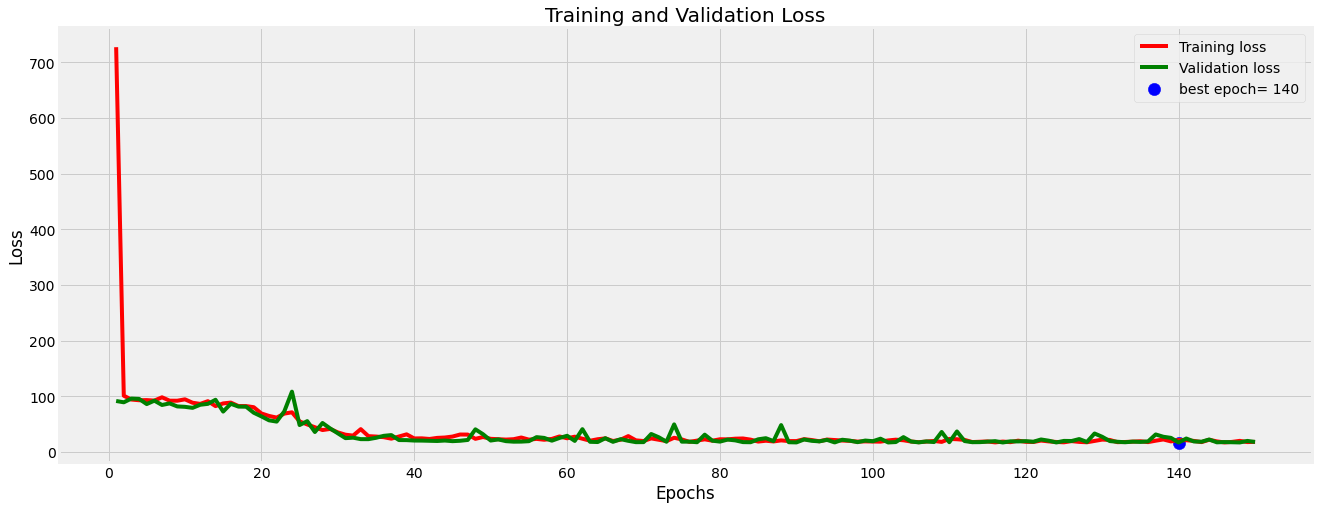

In [398]:
# Define needed variables
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

**Interpretation**:

The training process appears to be successful, with the model achieving good generalization between the training and validation datasets. The stability of the losses over time indicates that the model has found a good balance and is unlikely to benefit from additional training. The best epoch identified (140) should be considered for saving the model weights, as it represents the optimal point in training with the lowest validation error.

In [399]:
#metrics=['mean_absolute_error','mean_squared_error']

mae = history.history['mean_absolute_error']

acc_loss_df = pd.DataFrame({"Mean Absolute error" : mae,
                            "Loss" : tr_loss,
                            "Epoch" : Epochs})

acc_loss_df.style.bar(color = '#84A9AC',
                      subset = ['Mean Absolute error','Loss'])

,Mean Absolute error,Loss,Epoch
0,18.287348,727.433167,1
1,8.168253,101.319687,2
2,7.887227,94.447891,3
3,7.828648,93.199524,4
4,7.843926,93.454994,5
5,7.813077,92.590317,6
6,8.015723,98.490433,7
7,7.718317,92.391502,8
8,7.801277,92.342857,9
9,7.860832,94.853622,10


### Analsysis of the Metrics and Training Data:

#### 1. **Mean Absolute Error (MAE) and Loss over Epochs:**
   - The table tracks the Mean Absolute Error (MAE) and Loss (Mean Squared Error, MSE) over 150 epochs during the training of the Artificial Neural Network (ANN).
   - **MAE** is the average of the absolute differences between the predicted and actual values, providing a straightforward measure of prediction accuracy.
   - **Loss** (MSE) is the average of the squared differences between predicted and actual values, with higher penalties for larger errors, making it more sensitive to outliers.

#### 2. **Trend in MAE and Loss:**
   - **Early Epochs (1-20):**
     - Initially, both MAE and Loss are high, reflecting the model's early stages of learning, where it has significant prediction errors.
     - There is a notable drop in both metrics as the model quickly learns the patterns in the data. For instance, the MAE decreases from 18.29 at epoch 1 to 6.40 by epoch 21, while Loss drops sharply from 727.43 to 65.02.
   - **Middle Epochs (21-80):**
     - During this phase, MAE and Loss continue to decrease, albeit more gradually, as the model refines its predictions. 
     - By epoch 30, the MAE has further reduced to 4.26, and Loss has decreased to 31.30, indicating a steady improvement in the model's performance.
   - **Late Epochs (81-150):**
     - In the later epochs, both MAE and Loss values fluctuate slightly but generally stabilize, indicating that the model has reached a point where additional learning yields diminishing returns.
     - The final MAE of 3.26 and Loss of 18.42 suggest that the model has effectively minimized prediction errors and is providing accurate predictions.

#### 3. **Performance Interpretation:**
   - **Model Convergence:** 
     - The decreasing trend in both MAE and Loss signifies that the model is effectively learning and improving over time. The stabilization of these metrics in the later epochs indicates that the model has likely converged, meaning it has learned the underlying patterns in the data as much as possible.
   - **Final MAE and Loss Values:**
     - A final MAE of 3.26 implies that, on average, the model's predictions deviate from the actual life expectancy by about 3.26 years. This level of error is acceptable and demonstrates the model's ability to make reasonably accurate predictions.
     - The final Loss value of 18.42 (MSE) reflects the average squared error, with lower values indicating fewer and smaller large errors.

#### 4. **Model Performance Over Time:**
   - **Improvement:** The significant reduction in MAE and Loss from the beginning to the end of the training process indicates that the model has effectively learned the relationships in the data and improved its predictions.
   - **Stability:** The consistent MAE and Loss values in the later epochs suggest that the model is not overfitting or underfitting but has stabilized, indicating a well-trained model.

### Conclusion:
The table illustrates the ANN's learning process, showing how the model progressively reduces prediction errors over time. The final MAE and Loss values indicate that the model performs well, providing an acceptable level of accuracy in predicting life expectancy. The model's ability to stabilize in the later epochs suggests that it has reached an optimal level of learning, with minimal further gains to be made from additional training.

In [400]:
y_pred = model.predict(X_test)
R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R2 Score= 0.8394143201531671


### Interpretation of R² Score = 0.8394:

An R² score of 0.8394 indicates that the model successfully explains 83.94% of the variance in life expectancy data. This high R² value suggests that the model captures the majority of the variability in the data, demonstrating a strong fit. However, the remaining 16.06% of the variance is attributed to factors not captured by the model, which may include noise, missing variables, or the inherent complexity of predicting life expectancy.

### Model Performance:

- **Strong Fit:**
  - An R² score of 0.8394 is generally recognized as a strong indicator of a model's predictive accuracy, particularly in complex datasets like life expectancy, where numerous factors are at play.
  - The model has effectively learned the key patterns in the data, enabling it to make fairly accurate predictions on the test set.

- **Room for Improvement:**
  - Despite the high R² score, there is still potential for improvement. Enhancing the model's predictive capabilities could involve:
    - Incorporating additional relevant features.
    - Exploring non-linear relationships or using more advanced models.
    - Reducing noise through more thorough data preprocessing.

### Conclusion:

The R² score of 0.8394 demonstrates that the model explains a significant portion of the variance in life expectancy, indicating it is well-suited to the task. Nevertheless, the unexplained variance suggests that there is still room to refine and improve the model for even better performance.

## Report Final Thoughts

In comparing the models—Linear Regression, Random Forest Regressor, and Artificial Neural Network (ANN)—each demonstrated unique strengths:

- **Linear Regression** provided a solid baseline with an R² of 0.822 on the test set. It showed consistent performance with low prediction errors, making it a reliable, interpretable model. However, it may miss non-linear patterns in the data.

- **Random Forest Regressor** outperformed the other models with an R² of 0.957 on the test set, indicating excellent predictive accuracy and the ability to capture complex, non-linear relationships. However, its high performance on the training set suggests potential overfitting, which warrants careful monitoring.

- **Artificial Neural Network (ANN)** showed effective learning over time, stabilizing with a final MAE and loss that suggest good predictive accuracy. It is well-suited for capturing complex data patterns, though it requires careful tuning.

### Overall Model Comparison and Recommendation

- **Best Performer:** **Random Forest Regressor** offers the highest accuracy, making it the best choice for tasks where predictive power is critical.
- **Simplicity and Interpretability:** **Linear Regression** is ideal when a straightforward, interpretable model is needed.
- **Advanced Flexibility:** **ANN** is a strong option for complex datasets, offering room for further optimization.

### Final Recommendation

For the most accurate life expectancy predictions, use **Random Forest Regressor**. If simplicity and interpretability are prioritized, **Linear Regression** is recommended. For complex data scenarios requiring flexibility, consider the **Artificial Neural Network**.